Name: Sree Swiya Yarlagadda


Github Username: https://github.com/swiyasree


USC ID: 4295-5564-10

In [100]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import hamming as hamming_distance 

1. Multi-class and Multi-Label Classification Using Support Vector Machines


(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [101]:
dataframe = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
dataframe.drop(columns=['RecordID'], inplace=True)
columns = dataframe.columns
dataframe

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:


i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

In [102]:
X = dataframe[columns[:22]]
Y = dataframe[columns[22:]]

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [104]:
family_results = pd.DataFrame(columns=['Model', 'SVM Penalty (C)', 'Gamma', 'Exact Loss', 'Hamming Loss'])
genus_results = pd.DataFrame(columns=['Model', 'SVM Penalty (C)', 'Gamma', 'Exact Loss', 'Hamming Loss'])
species_results = pd.DataFrame(columns=['Model', 'SVM Penalty (C)', 'Gamma', 'Exact Loss', 'Hamming Loss'])


ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [105]:
#raw attributes
C_est = np.logspace(-3, 6, 10)
gamma_est = np.linspace(0.1, 2, 20)
params = {'estimator__gamma': gamma_est, 'estimator__C': C_est}
svm = OneVsRestClassifier(SVC(kernel='rbf'))
gridSearch = GridSearchCV(n_jobs=-1, estimator=svm, param_grid=params, cv=10)

In [106]:
# Family
gridSearch_family = gridSearch.fit(X_train, Y_train['Family'])

best_C_est_family = gridSearch_family.best_params_['estimator__C']
best_gamma_est_family = gridSearch_family.best_params_['estimator__gamma']
best_model_est_family = gridSearch_family.best_estimator_
Y_prediction_family = best_model_est_family.predict(X_test)
loss_family = 1 - accuracy_score(Y_prediction_family, Y_test['Family'])
hammingScore_family = hamming_loss(Y_prediction_family, Y_test['Family'])

In [107]:
print('Family - SVM Penalty (C) is', best_C_est_family)
print('Family - Gamma is', best_gamma_est_family)
print('Family - Exact Loss is', loss_family)
print('Family - Hamming Loss is', hammingScore_family)

Family - SVM Penalty (C) is 100.0
Family - Gamma is 2.0
Family - Exact Loss is 0.007874015748031482
Family - Hamming Loss is 0.007874015748031496


In [108]:
family.loc[len(family)] = ['RBF_SVM_Raw', 
                           str(best_C_est_family), 
                           str(best_gamma_est_family), 
                           str(loss_family), 
                           str(hammingScore_family)] 

In [109]:
# Genus
gridSearch_genus = gridSearch.fit(X_train, Y_train['Genus'])

best_C_est_genus = gridSearch_genus.best_params_['estimator__C']
best_gamma_est_genus = gridSearch_genus.best_params_['estimator__gamma']
best_model_est_genus = gridSearch_genus.best_estimator_
Y_prediction_genus = best_model_est_genus.predict(X_test)
loss_genus = 1 - accuracy_score(Y_prediction_genus, Y_test['Genus'])
hammingScore_genus = hamming_loss(Y_prediction_genus, Y_test['Genus'])

In [110]:
print('Genus - SVM Penalty (C) is', best_C_est_genus)
print('Genus - Gamma is', best_gamma_est_genus)
print('Genus - Exact Loss is', loss_genus)
print('Genus - Hamming Loss is', hammingScore_genus)

Genus - SVM Penalty (C) is 10.0
Genus - Gamma is 1.3
Genus - Exact Loss is 0.009726725335803654
Genus - Hamming Loss is 0.009726725335803613


In [111]:
genus.loc[len(genus)] = ['RBF_SVM_Raw', 
                         str(best_C_est_genus), 
                         str(best_gamma_est_genus), 
                         str(loss_genus), 
                         str(hammingScore_genus)]

In [112]:
# Species
gridSearch_species = gridSearch.fit(X_train, Y_train['Species'])

best_C_est_species = gridSearch_species.best_params_['estimator__C']
best_gamma_est_species = gridSearch_species.best_params_['estimator__gamma']
best_model_est_species = gridSearch_species.best_estimator_
Y_prediction_species = best_model_est_species.predict(X_test)
loss_species = 1 - accuracy_score(Y_prediction_species, Y_test['Species'])
hammingScore_species = hamming_loss(Y_prediction_species, Y_test['Species'])

In [113]:
print('Species - SVM Penalty (C) is', best_C_est_species)
print('Species - Gamma is', best_gamma_est_species)
print('Species - Exact Loss is', loss_species)
print('Species - Hamming Loss is', hammingScore_species)

Species - SVM Penalty (C) is 10.0
Species - Gamma is 1.7
Species - Exact Loss is 0.007410838351088467
Species - Hamming Loss is 0.007410838351088467


In [114]:
species.loc[len(species)] = ['RBF_SVM_Raw', 
                             str(best_C_est_species), 
                             str(best_gamma_est_species), 
                             str(loss_species), 
                             str(hammingScore_species)]

In [115]:
# Standardize attributes
standard_scaler = StandardScaler()
standard_scaler.fit(X)
std_X_train = standard_scaler.transform(X_train)
std_X_test = standard_scaler.transform(X_test)

In [116]:
# Family
gridSearch_family = gridSearch.fit(std_X_train, Y_train['Family'])

best_C_est_family = gridSearch_family.best_params_['estimator__C']
best_gamma_est_family = gridSearch_family.best_params_['estimator__gamma']
best_model_est_family = gridSearch_family.best_estimator_
Y_prediction_family = best_model_est_family.predict(std_X_test)
loss_family = 1 - accuracy_score(Y_prediction_family, Y_test['Family'])
hammingScore_family = hamming_loss(Y_prediction_family, Y_test['Family'])

In [117]:
print('Family - SVM Penalty (C) is', best_C_est_family)
print('Family - Gamma is', best_gamma_est_family)
print('Family - Exact Loss is', loss_family)
print('Family - Hamming Loss is', hammingScore_family)

Family - SVM Penalty (C) is 100.0
Family - Gamma is 0.1
Family - Exact Loss is 0.0111162575266327
Family - Hamming Loss is 0.0111162575266327


In [118]:
family.loc[len(family)] = ['RBF_SVM_Std', 
                           str(best_C_est_family), 
                           str(best_gamma_est_family), 
                           str(loss_family), 
                           str(hammingScore_family)]

In [119]:
# Genus
gridSearch_genus = gridSearch.fit(std_X_train, Y_train['Genus'])

best_C_est_genus = gridSearch_genus.best_params_['estimator__C']
best_gamma_est_genus = gridSearch_genus.best_params_['estimator__gamma']
best_model_est_genus = gridSearch_genus.best_estimator_
Y_prediction_genus = best_model_est_genus.predict(std_X_test)
loss_genus = 1 - accuracy_score(Y_prediction_genus, Y_test['Genus'])
hammingScore_genus = hamming_loss(Y_prediction_genus, Y_test['Genus'])

In [120]:
print('Genus - SVM Penalty (C) is', best_C_est_genus)
print('Genus - Gamma is', best_gamma_est_genus)
print('Genus - Exact Loss is', loss_genus)
print('Genus - Hamming Loss is', hammingScore_genus)

Genus - SVM Penalty (C) is 10.0
Genus - Gamma is 0.1
Genus - Exact Loss is 0.012968967114404872
Genus - Hamming Loss is 0.012968967114404817


In [121]:
genus.loc[len(genus)] = ['RBF_SVM_Std', 
                         str(best_C_est_genus), 
                         str(best_gamma_est_genus), 
                         str(loss_genus), 
                         str(hammingScore_genus)]

In [122]:
# Species
gridSearch_species = gridSearch.fit(std_X_train, Y_train['Species'])

best_C_est_species = gridSearch_species.best_params_['estimator__C']
best_gamma_est_species = gridSearch_species.best_params_['estimator__gamma']
best_model_est_species = gridSearch_species.best_estimator_
Y_prediction_species = best_model_est_species.predict(std_X_test)
loss_species = 1 - accuracy_score(Y_prediction_species, Y_test['Species'])
hammingScore_species = hamming_loss(Y_prediction_species, Y_test['Species'])

In [123]:
print('Species - SVM Penalty (C) is', best_C_est_species)
print('Species - Gamma is', best_gamma_est_species)
print('Species - Exact Loss is', loss_species)
print('Species - Hamming Loss is', hammingScore_species)

Species - SVM Penalty (C) is 100.0
Species - Gamma is 0.1
Species - Exact Loss is 0.01204261232051873
Species - Hamming Loss is 0.012042612320518759


In [124]:
species.loc[len(species)] = ['RBF_SVM_Std', 
                             str(best_C_est_species), 
                             str(best_gamma_est_species), 
                             str(loss_species), 
                             str(hammingScore_species)]

iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [125]:
params = {'C': C_est}
svm = LinearSVC(penalty='l1', dual=False)
gridSearch = GridSearchCV(n_jobs=-1, estimator=svm, param_grid=params, cv=10)

In [126]:
# Family
gridSearch_family = gridSearch.fit(std_X_train, Y_train['Family'])

best_C_est_family = gridSearch_family.best_params_['C']
best_model_est_family = gridSearch_family.best_estimator_
Y_prediction_family = best_model_est_family.predict(std_X_test)
loss_family = 1 - accuracy_score(Y_prediction_family, Y_test['Family'])
hammingScore_family = hamming_loss(Y_prediction_family, Y_test['Family'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [127]:
print('Family - SVM Penalty (C) is', best_C_est_family)
print('Family - Exact Loss is', loss_family)
print('Family - Hamming Loss is', hammingScore_family)

Family - SVM Penalty (C) is 1.0
Family - Exact Loss is 0.06577119036591017
Family - Hamming Loss is 0.06577119036591014


In [128]:
family.loc[len(family)] = ['L1_SVM_Std', 
                           str(best_C_est_family), 
                           "",  
                           str(loss_family), 
                           str(hammingScore_family)]

In [129]:
# Genus
gridSearch_genus = gridSearch.fit(std_X_train, Y_train['Genus'])

best_C_est_genus = gridSearch_genus.best_params_['C']
best_model_est_genus = gridSearch_genus.best_estimator_
Y_prediction_genus = best_model_est_genus.predict(std_X_test)
loss_genus = 1 - accuracy_score(Y_prediction_genus, Y_test['Genus'])
hammingScore_genus = hamming_loss(Y_prediction_genus, Y_test['Genus'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [130]:
print('Genus - SVM Penalty (C) is', best_C_est_genus)
print('Genus - Exact Loss is', loss_genus)
print('Genus - Hamming Loss is', hammingScore_genus)

Genus - SVM Penalty (C) is 100.0
Genus - Exact Loss is 0.05187586845761927
Genus - Hamming Loss is 0.05187586845761927


In [131]:

genus.loc[len(genus)] = ['L1_SVM_Std', 
                         str(best_C_est_genus), 
                         "", 
                         str(loss_genus), 
                         str(hammingScore_genus)]

In [132]:
# Species
gridSearch_species = gridSearch.fit(std_X_train, Y_train['Species'])

best_C_est_species = gridSearch_species.best_params_['C']
best_model_est_species = gridSearch_species.best_estimator_
Y_prediction_species = best_model_est_species.predict(std_X_test)
loss_species = 1 - accuracy_score(Y_prediction_species, Y_test['Species'])
hammingScore_species = hamming_loss(Y_prediction_species, Y_test['Species'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [133]:
print('Species - SVM Penalty (C) is', best_C_est_species)
print('Species - Exact Loss is', loss_species)
print('Species - Hamming Loss is', hammingScore_species)

Species - SVM Penalty (C) is 1.0
Species - Exact Loss is 0.043075497915701755
Species - Hamming Loss is 0.04307549791570171


In [134]:
species.loc[len(species)] = ['L1_SVM_Std', 
                             str(best_C_est_species), 
                             "",  
                             str(loss_species), 
                             str(hammingScore_species)]


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [135]:
# Family
smote_X_family, smote_Y_family = SMOTE().fit_resample(std_X_train, Y_train['Family'])
gridSearch_family = gridSearch.fit(smote_X_family, smote_Y_family)

best_C_est_family = gridSearch_family.best_params_['C']
best_model_est_family = gridSearch_family.best_estimator_
Y_prediction_family = best_model_est_family.predict(std_X_test)
exact_loss_family = 1 - accuracy_score(Y_prediction_family, Y_test['Family'])
hamming_score_family = hamming_loss(Y_prediction_family, Y_test['Family'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [136]:
print('Family - SVM Penalty (C) is', best_C_est_family)
print('Family - Exact Loss is', exact_loss_family)
print('Family - Hamming Loss is', hamming_score_family)

Family - SVM Penalty (C) is 1.0
Family - Exact Loss is 0.08383510884668832
Family - Hamming Loss is 0.08383510884668828


In [137]:
family.loc[len(family)] = ['L1_SVM_SMOTE', 
                           str(best_C_est_family), 
                           "", 
                           str(exact_loss_family), 
                           str(hamming_score_family)]

In [138]:
# Genus
smote_X_genus, smote_Y_genus = SMOTE().fit_resample(std_X_train, Y_train['Genus'])
gridSearch_genus = gridSearch.fit(smote_X_genus, smote_Y_genus)

best_C_est_genus = gridSearch_genus.best_params_['C']
best_model_est_genus = gridSearch_genus.best_estimator_
Y_prediction_genus = best_model_est_genus.predict(std_X_test)
exact_loss_genus = 1 - accuracy_score(Y_prediction_genus, Y_test['Genus'])
hamming_score_genus = hamming_loss(Y_prediction_genus, Y_test['Genus'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [139]:
print('Genus - SVM Penalty (C) is', best_C_est_genus)
print('Genus - Exact Loss is', exact_loss_genus)
print('Genus - Hamming Loss is', hamming_score_genus)

Genus - SVM Penalty (C) is 100.0
Genus - Exact Loss is 0.09402501157943488
Genus - Hamming Loss is 0.09402501157943492


In [140]:
genus.loc[len(genus)] = ['L1_SVM_SMOTE', 
                         str(best_C_est_genus), 
                         "",  
                         str(exact_loss_genus), 
                         str(hamming_score_genus)]

In [141]:
# Species
smote_X_species, smote_Y_species = SMOTE().fit_resample(std_X_train, Y_train['Species'])
gridSearch_species = gridSearch.fit(smote_X_species, smote_Y_species)

best_C_est_species = gridSearch_species.best_params_['C']
best_model_est_species = gridSearch_species.best_estimator_
Y_prediction_species = best_model_est_species.predict(std_X_test)
exact_loss_species = 1 - accuracy_score(Y_prediction_species, Y_test['Species'])
hamming_score_species = hamming_loss(Y_prediction_species, Y_test['Species'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [142]:
print('Species - SVM Penalty (C) is', best_C_est_species)
print('Species - Exact Loss is', exact_loss_species)
print('Species - Hamming Loss is', hamming_score_species)

Species - SVM Penalty (C) is 100.0
Species - Exact Loss is 0.048170449282075034
Species - Hamming Loss is 0.048170449282075034


In [143]:
species.loc[len(species)] = ['L1_SVM_SMOTE', 
                             str(best_C_est_species), 
                             "", 
                             str(exact_loss_species), 
                             str(hamming_score_species)]

In [149]:
family

,Model,SVM Penalty (C),Gamma,Exact Loss,Hamming Loss
0,RBF_SVM_Raw,100.0,2.0,0.007874015748031482,0.007874015748031496
1,RBF_SVM_Std,100.0,0.1,0.0111162575266327,0.0111162575266327
2,L1_SVM_Std,1.0,,0.06530801296896716,0.06530801296896711
3,L1_SVM_SMOTE,100.0,,0.04353867531264477,0.05187586845761927
4,RBF_SVM_Raw,100.0,2.0,0.007874015748031482,0.007874015748031496
5,RBF_SVM_Std,100.0,0.1,0.0111162575266327,0.0111162575266327
6,L1_SVM_Std,1.0,,0.06577119036591017,0.06577119036591014
7,L1_SVM_SMOTE,1.0,,0.08383510884668832,0.08383510884668828


In [150]:
genus

,Model,SVM Penalty (C),Gamma,Exact Loss,Hamming Loss
0,RBF_SVM_Raw,10.0,1.3,0.009726725335803654,0.009726725335803613
1,RBF_SVM_Std,10.0,0.1,0.012968967114404872,0.012968967114404817
2,L1_SVM_Std,100.0,,0.05187586845761927,0.05187586845761927
3,L1_SVM_SMOTE,100000.0,,0.09356183418249187,0.0935618341824919
4,RBF_SVM_Raw,10.0,1.3,0.009726725335803654,0.009726725335803613
5,RBF_SVM_Std,10.0,0.1,0.012968967114404872,0.012968967114404817
6,L1_SVM_Std,100.0,,0.05187586845761927,0.05187586845761927
7,L1_SVM_SMOTE,100.0,,0.09402501157943488,0.09402501157943492


In [151]:
species

,Model,SVM Penalty (C),Gamma,Exact Loss,Hamming Loss
0,RBF_SVM_Raw,10.0,1.7,0.007410838351088467,0.007410838351088467
1,RBF_SVM_Std,100.0,0.1,0.01204261232051873,0.012042612320518759
2,L1_SVM_Std,1.0,,0.04353867531264477,0.05187586845761927
3,L1_SVM_SMOTE,100000.0,,0.04955998147290408,0.04955998147290412
4,RBF_SVM_Raw,10.0,1.7,0.007410838351088467,0.007410838351088467
5,RBF_SVM_Std,100.0,0.1,0.01204261232051873,0.012042612320518759
6,L1_SVM_Std,1.0,,0.043075497915701755,0.04307549791570171
7,L1_SVM_SMOTE,100.0,,0.048170449282075034,0.048170449282075034


SVM with Gaussian Kernels and One-vs-All Classifier: This method creates specialized classifiers for each category, akin to having detectives focused on specific suspects, leading to accurate predictions even with imbalanced data.

SVM with L1 Penalized Measures: Treating all classes equally during training can lead to inaccuracies, like a judge giving equal weight to all evidence regardless of its relevance, especially in cases of imbalanced data.

Impact of Data Preprocessing (Standardization): Standardizing data ensures uniformity in feature scales, but in this case, it didn't significantly affect classifier performance, akin to detectives using standard or custom tools with no major impact on solving the case.

2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [152]:
best_K_values = {}
for i in range(50):
    silhouette_scores = []
    for k in range(2, 51):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    best_K_values[i] = np.argmax(silhouette_scores) + 2

Text(0, 0.5, 'Silhouette Score')

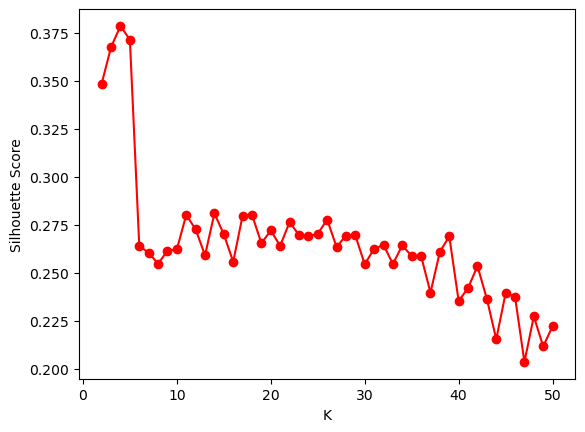

In [175]:
plt.plot(range(2, 51), silhouette_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [176]:
optimal_K = best_K_values[0]
best_model = KMeans(n_clusters=optimal_K)
labels = best_model.fit_predict(X)
clusters = np.unique(labels)
clusters.sort()

In [177]:
majority_family = []
majority_genus = []
majority_species = []

for cluster in clusters:
    index = np.where(labels == cluster)
    
    family_label = Y['Family'].iloc[index]
    genus_label = Y['Genus'].iloc[index]
    species_label = Y['Species'].iloc[index]

    majority_family.append(family_label.value_counts().idxmax())
    majority_genus.append(genus_label.value_counts().idxmax())
    majority_species.append(species_label.value_counts().idxmax())

In [178]:
predicted_family_labels = np.empty(len(labels), dtype='object')
predicted_genus_labels = np.empty(len(labels), dtype='object')
predicted_species_labels = np.empty(len(labels), dtype='object')

In [179]:
for cluster in clusters:
    index = np.where(labels == cluster)
    predicted_family_labels[index] = majority_family[cluster]
    predicted_genus_labels[index] = majority_genus[cluster]
    predicted_species_labels[index] = majority_species[cluster]

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [180]:
def hamming_dist(true_labels, predicted_labels):
    return np.sum(true_labels != predicted_labels)

def hamming_distance(true_set, pred_set):
    distances = []
    for true_labels, pred_labels in zip(true_set, pred_set):
        distances.append(hamming_dist(true_labels, pred_labels))
    return distances

In [181]:
true_labels_all = Y['Family'].tolist() + Y['Genus'].tolist() + Y['Species'].tolist()
predicted_labels_all = np.concatenate([predicted_family_labels, predicted_genus_labels, predicted_species_labels])

In [182]:
print('The average hamming distance =', np.mean(hamming_distance(true_labels_all, predicted_labels_all)))
print('The average hamming score =', 1 - hamming_loss(true_labels_all, predicted_labels_all))
print('The average hamming loss =', hamming_loss(true_labels_all, predicted_labels_all))

The average hamming distance = 0.2224229789205467
The average hamming score = 0.7775770210794533
The average hamming loss = 0.2224229789205467


In [183]:
best_Ks = {}
for i in range(50):
    scores = []
    for k in range(2, 51):
        model = KMeans(n_clusters=k)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    best_k = np.argmax(scores) + 2
    best_Ks[i] = best_k

In [184]:
best_labels = {}
best_clusters = {}
for i in range(50):
    best_model = KMeans(n_clusters=best_Ks[i])
    labels = best_model.fit_predict(X)
    best_labels[i] = labels
    clusters = np.unique(labels)
    clusters.sort()
    best_clusters[i] = clusters

In [190]:
majority_labels = {}

def compute_majority_labels(y, labels):
    majority = []
    for cluster in np.unique(labels):
        index = np.where(labels == cluster)
        label = y.iloc[index].value_counts().idxmax()
        majority.append(label)
    return majority

for i in range(50):
    majority_labels[i] = {
        'Family': compute_majority_labels(Y['Family'], best_labels[i]),
        'Genus': compute_majority_labels(Y['Genus'], best_labels[i]),
        'Species': compute_majority_labels(Y['Species'], best_labels[i])
    }

In [191]:
predicted_labels = {}

for i in range(50):
    predicted_labels[i] = {
        'Family': [majority_labels[i]['Family'][label] for label in best_labels[i]],
        'Genus': [majority_labels[i]['Genus'][label] for label in best_labels[i]],
        'Species': [majority_labels[i]['Species'][label] for label in best_labels[i]]
    }

In [194]:
ham_dist = []
ham_loss = []
ham_score = []

for i in range(50):
    y_pred = np.concatenate([predicted_labels_family[i], predicted_labels_genus[i], predicted_labels_species[i]])
    
    ham_dist.append(np.mean(hamming_distance(true_labels_all, predicted_labels_all)))
    ham_loss.append(hamming_loss(true_labels_all, predicted_labels_all))
    ham_score.append(1 - accuracy_score(true_labels_all, predicted_labels_all))

In [195]:
print('The average of 50 hamming distance =', np.mean(ham_dist))
print('The standard deviation of 50 hamming distance =', np.std(ham_dist))
print('The average of 50 hamming loss =', np.mean(ham_loss))
print('The standard deviation of 50 hamming loss =', np.std(ham_loss))
print('The average of 50 hamming score =', np.mean(ham_score))
print('The standard deviation of 50 hamming score =', np.std(ham_score))
print('The 50 hamming distance =')

for i, dist in enumerate(ham_dist):
    print(i + 1, dist)
print('The 50 hamming loss =')
for i, loss in enumerate(ham_loss):
    print(i + 1, loss)
print('The 50 hamming score =')
for i, score in enumerate(ham_score):
    print(i + 1, score)

The average of 50 hamming distance = 0.2224229789205467
The standard deviation of 50 hamming distance = 0.0
The average of 50 hamming loss = 0.2224229789205467
The standard deviation of 50 hamming loss = 0.0
The average of 50 hamming score = 0.22242297892054666
The standard deviation of 50 hamming score = 2.7755575615628914e-17
The 50 hamming distance =
1 0.2224229789205467
2 0.2224229789205467
3 0.2224229789205467
4 0.2224229789205467
5 0.2224229789205467
6 0.2224229789205467
7 0.2224229789205467
8 0.2224229789205467
9 0.2224229789205467
10 0.2224229789205467
11 0.2224229789205467
12 0.2224229789205467
13 0.2224229789205467
14 0.2224229789205467
15 0.2224229789205467
16 0.2224229789205467
17 0.2224229789205467
18 0.2224229789205467
19 0.2224229789205467
20 0.2224229789205467
21 0.2224229789205467
22 0.2224229789205467
23 0.2224229789205467
24 0.2224229789205467
25 0.2224229789205467
26 0.2224229789205467
27 0.2224229789205467
28 0.2224229789205467
29 0.2224229789205467
30 0.2224229789

3. ISLR 12.6.2

In [196]:
mat = [
    [0 , 0.3 , 0.4 , 0.7],
    [0.3 , 0 , 0.5 , 0.8],
    [0.4 , 0.5 , 0 ,0.45],
    [0.7 , 0.8 , 0.45 ,0]
]

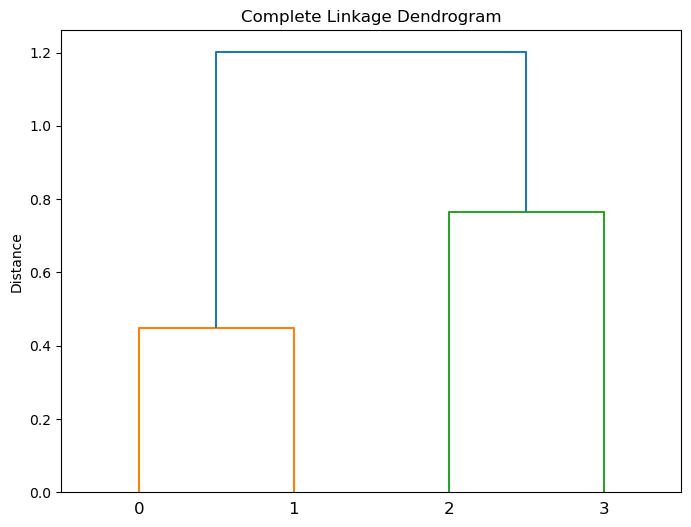

In [198]:
# 3. a)
links_complete = linkage(mat, method='complete', optimal_ordering=False)
plt.figure(figsize=(8, 6))
dendrogram(links_complete)
plt.ylabel('Distance')
plt.title('Complete Linkage Dendrogram')
plt.show()

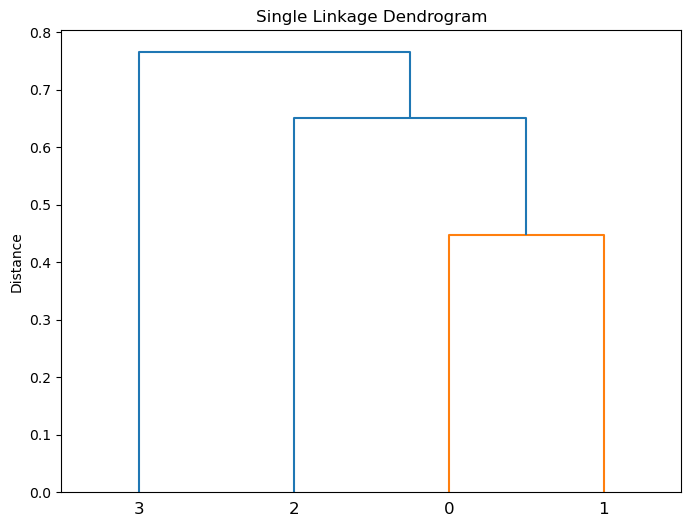

In [199]:
# 3. b)
links_single = linkage(mat, method='single', optimal_ordering=False)
plt.figure(figsize=(8, 6))
dendrogram(links_single)
plt.ylabel('Distance')
plt.title('Single Linkage Dendrogram')
plt.show()

3. c)
In the complete linkage dendrogram (a), the points labelled (0,1) and (2,3) are in the same clusters.

3. d)
In the single linkage dendrogram (b), the points labelled (0,1,2) and (3) are in the same clusters.

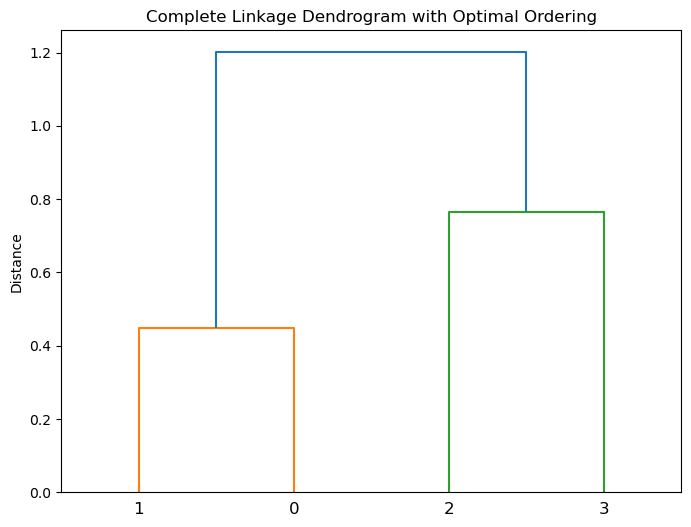

In [200]:
# 3. e)
links_optimal_ordering = linkage(mat, method='complete', optimal_ordering=True)
plt.figure(figsize=(8, 6))
dendrogram(links_optimal_ordering)
plt.ylabel('Distance')
plt.title('Complete Linkage Dendrogram with Optimal Ordering')
plt.show()